In [ ]:
import numpy as np
from names_dataset import NameDataset
from nn import Node, Layer, MLP
import matplotlib.pyplot as plt

In [ ]:
namedataset = NameDataset()
many_names = namedataset.get_top_names(500, use_first_names=True, country_alpha2='IT', gender='F')['IT']['F']

In [ ]:
print(len(many_names))
print(type(many_names))
print(many_names[-20:])

many_names = [name.lower() for name in many_names]
print(many_names[-20:])

In [ ]:
unique_chars = set()
for name in many_names:
    unique_chars.update(set(name.lower()))
    if ' ' in name:
        print(name)
        many_names.remove(name)
        unique_chars.remove(' ')


unique_chars = sorted(list(unique_chars))
print(len(many_names))
print(len(unique_chars))
print(unique_chars)



In [ ]:
S_to_I = {s:i+1 for i,s in enumerate(unique_chars)}
S_to_I['.'] = 0
I_to_S = {s:i for i,s in S_to_I.items()}

print(S_to_I)
print(I_to_S)
import torch

In [676]:
bigrams = np.zeros((27, 27))
for name in many_names:
    chrs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = S_to_I[ch1]
        idx2 = S_to_I[ch2]
        bigrams[idx1, idx2] += 1

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(b, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = I_to_S[i] + I_to_S[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, bigrams[i, j].item(), ha='center', va='top', color='gray')

In [677]:
bigrams += 1e-10
P = bigrams / bigrams.sum(axis=1, keepdims=True)

In [681]:
def sample_names():
    ix = 0
    name = ''
    while True:
        p = P[ix,:]
        ix = np.random.choice(27, p=p, size=1).item()
        name += I_to_S[ix]
        if ix == 0:
            break

    print(name)

for _ in range(10):
    sample_names()


giolbrndolalucriafeta.
pandeta.
pa.
a.
ma.
atilelanelori.
na.
a.
lenanosta.
dinerepilaliania.


In [684]:
log_likelihood = 0
n = 0
for name in ['nomark']:
    chrs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = S_to_I[ch1]
        idx2 = S_to_I[ch2]
        prob = P[idx1, idx2]
        logprob = np.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'P({ch1}{ch2}) = {prob:.3f} -> logprob = {logprob:.3f}')

print(f'log_likelihood = {log_likelihood:.3f}')
neg_log_likelihood = -log_likelihood
print(f'neg_log_likelihood = {neg_log_likelihood:.3f}')
avg_neg_log_likelihood = neg_log_likelihood / n
print(f'avg_neg_log_likelihood = {avg_neg_log_likelihood:.3f}')

P(.n) = 0.044 -> logprob = -3.127
P(no) = 0.023 -> logprob = -3.761
P(om) = 0.042 -> logprob = -3.178
P(ma) = 0.504 -> logprob = -0.685
P(ar) = 0.094 -> logprob = -2.364
P(rk) = 0.000 -> logprob = -28.396
P(k.) = 0.000 -> logprob = -25.511
log_likelihood = -67.023
neg_log_likelihood = 67.023
avg_neg_log_likelihood = 9.575


In [692]:
xs, ys = [], []
for name in many_names[:1]:
    chrs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = S_to_I[ch1]
        idx2 = S_to_I[ch2]
        xs.append(idx1)
        ys.append(idx2)
        print(f'P({ch1}{ch2}) = {P[idx1, idx2]:.3f}')

xs, ys = np.array(xs), np.array(ys)
print(xs)
print(ys)

P(.m) = 0.142
P(ma) = 0.504
P(ar) = 0.094
P(ri) = 0.367
P(ia) = 0.336
P(a.) = 0.568
[ 0 13  1 18  9  1]
[13  1 18  9  1  0]


(6, 27)


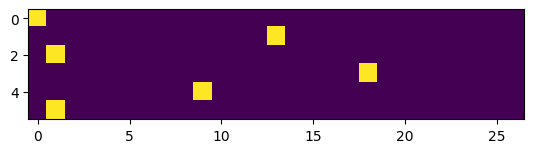

In [703]:
xenc = np.zeros((len(xs), 27))
xenc[np.arange(len(xs)), xs] = 1
print(xenc.shape)

plt.imshow(xenc)